# Cat Sim (1512.01838)

In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

Hamiltonian and initial state:
$$H = \frac{\hbar\Omega}{2}\left(\sigma_-a^\dagger+\sigma_+a\right)$$
$$\left|\psi_{ent}\right>=\frac{1}{\sqrt{2}}\left(\left|\uparrow\right>\left|\phi_-\right>+\left|\downarrow\right>\left|\phi_+\right>\right),~\left|\psi_\pm\right>=\frac{1}{\sqrt{2}}\left(\left|\alpha\right>\pm\left|-\alpha\right>\right)$$
Repump spin state:
$$\rho_m = \frac{1}{2}\left(\left|\psi_+\right>\left<\psi_+\right|+\left|\psi_-\right>\left<\psi_-\right|\right)\left(\approx\frac{1}{2}\left(\left|\alpha\right>\left<\alpha\right|+\left|-\alpha\right>\left<-\alpha\right|\right)?\right)$$
Detect spin-up:
$$\left|\psi_m\right> = \left|\phi_-\right> = \frac{1}{\sqrt{2}}\left(\left|\alpha\right>-\left|-\alpha\right>\right)$$
Detect spin-down:
$$\left|\psi_p\right> = \left|\phi_+\right> = \frac{1}{\sqrt{2}}\left(\left|\alpha\right>+\left|-\alpha\right>\right)$$

In [2]:
nMax = 100
navg = 5

In [68]:
def H(Omega, times, psi):
    H = Omega/2*(qt.tensor(qt.sigmam(), qt.create(nMax))+qt.tensor(qt.sigmap(), qt.destroy(nMax)))
    
    result = qt.mesolve(H, psi, times, [], qt.tensor((qt.qeye(2)+qt.sigmaz())/2, qt.qeye(nMax)))
    return result.expect[0]

In [69]:
def H_b(Omega, times, psi):
    H = Omega/2*(qt.tensor(qt.sigmap(), qt.create(nMax))+qt.tensor(qt.sigmam(), qt.destroy(nMax)))
    
    result = qt.mesolve(H, psi, times, [], qt.tensor((qt.qeye(2)+qt.sigmaz())/2, qt.qeye(nMax)))
    return result.expect[0]

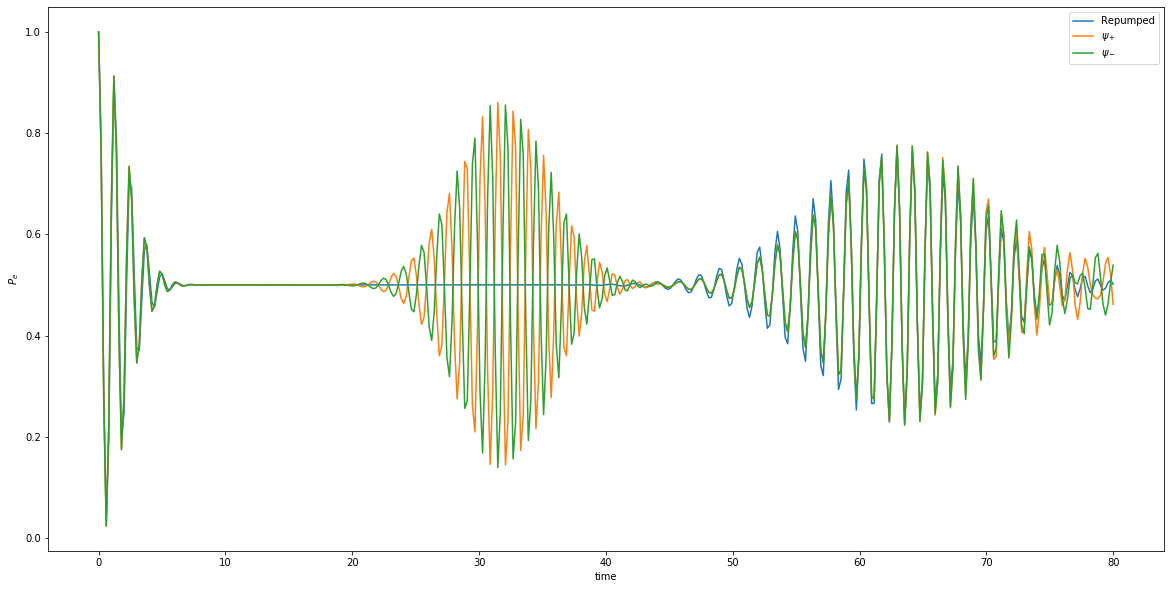

In [70]:
timeList = np.linspace(0, 80, 400)

coh_p = (qt.coherent(nMax, navg)+qt.coherent(nMax, -navg)).unit()
coh_m = (qt.coherent(nMax, navg)-qt.coherent(nMax, -navg)).unit()

# psi = qt.tensor(qt.ket2dm(qt.basis(2, 0)), (qt.ket2dm(coh_p)+qt.ket2dm(coh_m)).unit())
psi = qt.tensor(qt.ket2dm(qt.basis(2, 0)), (qt.ket2dm(qt.coherent(nMax, navg))+qt.ket2dm(qt.coherent(nMax, -navg))).unit())
psi_p = qt.tensor(qt.basis(2, 0), (qt.coherent(nMax, navg)+qt.coherent(nMax, -navg)).unit())
psi_m = qt.tensor(qt.basis(2, 0), (qt.coherent(nMax, navg)-qt.coherent(nMax, -navg)).unit())

plt.figure(figsize=(20,10))
plt.plot(timeList, H_b(1, timeList, psi), label = "Repumped")
plt.plot(timeList, H(1, timeList, psi_p), label = "$\psi_+$")
plt.plot(timeList, H(1, timeList, psi_m), label = "$\psi_-$")
plt.legend(loc = "upper right")
plt.xlabel("time")
plt.ylabel("$P_e$")
plt.show()

In [25]:
# opr = []
# for i in range(2*navg**2):
#     opr.append(qt.tensor(qt.qeye(2), qt.ket2dm(qt.basis(nMax, i))))

# n_exp = []
# n_exp_m = []
# n_exp_p = []
# for i in opr:
#     n_exp.append(qt.expect(psi, i))
#     n_exp_p.append(qt.expect(qt.ket2dm(psi_p), i))
#     n_exp_m.append(qt.expect(qt.ket2dm(psi_m), i))
    
# plt.figure(figsize=(20,10))
# plt.plot(n_exp, label = "Repumped")
# plt.plot(n_exp_p, label = "$\psi_+$")
# plt.plot(n_exp_m, label = "$\psi_-$")
# plt.legend(loc = "upper right")
# plt.xlabel("n")
# plt.ylabel("p")
# plt.show()

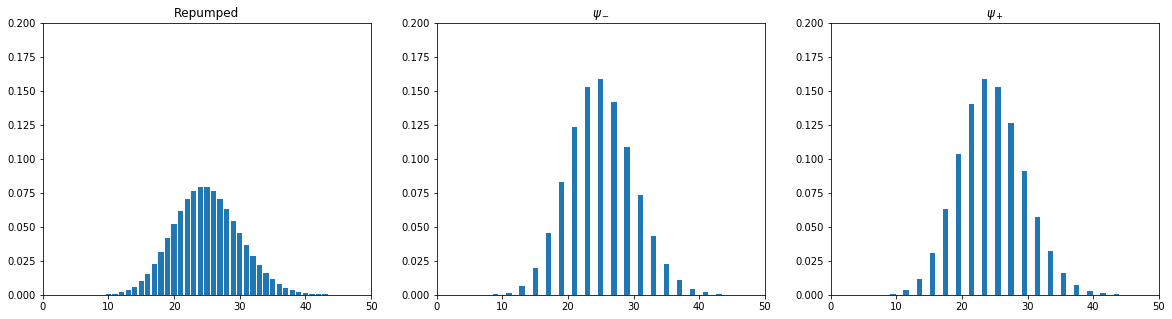

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].bar(np.arange(0, 2*navg**2), psi.diag()[:2*navg**2])
axes[0].set_title("Repumped")
axes[0].set(xlim=(0, 2*navg**2), ylim=(0, 0.2))

axes[1].bar(np.arange(0, 2*navg**2), qt.ket2dm(psi_m).diag()[:2*navg**2])
axes[1].set_title("$\psi_-$")
axes[1].set(xlim=(0, 2*navg**2), ylim=(0, 0.2))

axes[2].bar(np.arange(0, 2*navg**2)-.5, qt.ket2dm(psi_p).diag()[:2*navg**2])
axes[2].set_title("$\psi_+$")
axes[2].set(xlim=(0, 2*navg**2), ylim=(0, 0.2))

plt.show()

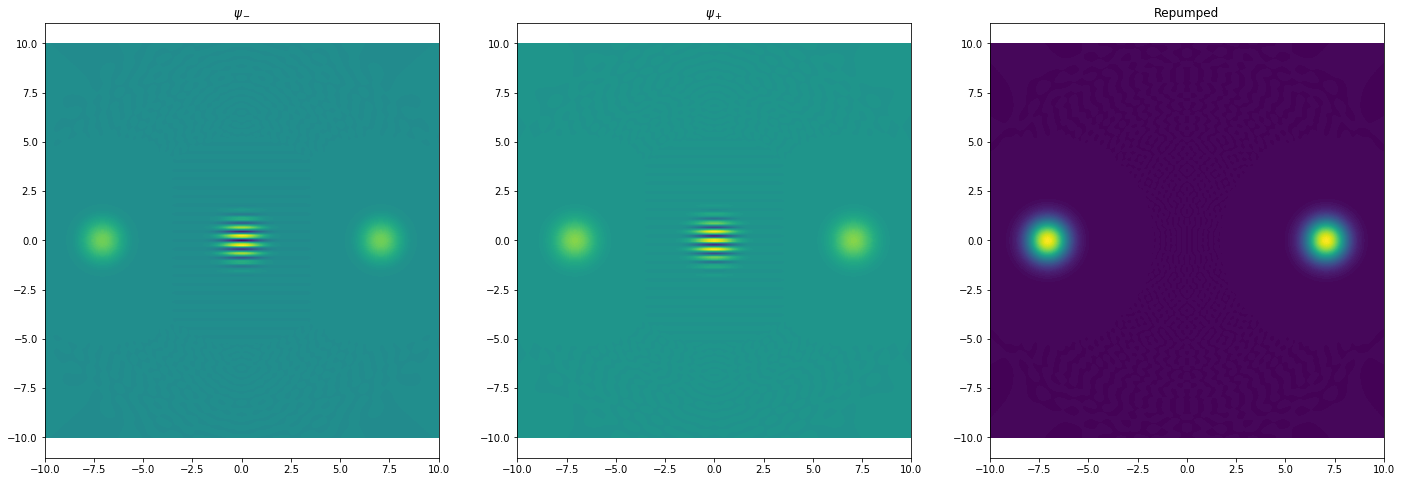

In [134]:
# Wigner function

xvec = np.linspace(-10, 10, 200)
yvec = np.linspace(-10, 10, 200)
W_psim = qt.wigner(psi_m, xvec, yvec)
W_psip = qt.wigner(psi_p, xvec, yvec)
W_psi = qt.wigner(psi, xvec, yvec)

# plot the results

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

cont0 = axes[0].contourf(xvec, yvec, W_psim, 100)
axes[0].axis('equal')
axes[0].set(xlim=(-10, 10), ylim=(-10, 10))
lbl0 = axes[0].set_title("$\psi_-$")

cont1 = axes[1].contourf(xvec, yvec, W_psip, 100)
axes[1].axis('equal')
axes[1].set(xlim=(-10, 10), ylim=(-10, 10))
lbl1 = axes[1].set_title("$\psi_+$")

cont2 = axes[2].contourf(xvec, yvec, W_psi, 100)
axes[2].axis('equal')
axes[2].set(xlim=(-10, 10), ylim=(-10, 10))
lbl2 = axes[2].set_title("Repumped")

plt.show()

### Squeezed state:

In [168]:
r = 1
phi = 0

In [169]:
s = qt.tensor(qt.qeye(2), qt.squeeze(nMax, r*np.exp(1j*phi)))
# psi_sq = (s*psi*s.conj()).unit()
psi_p_sq = s*psi_p

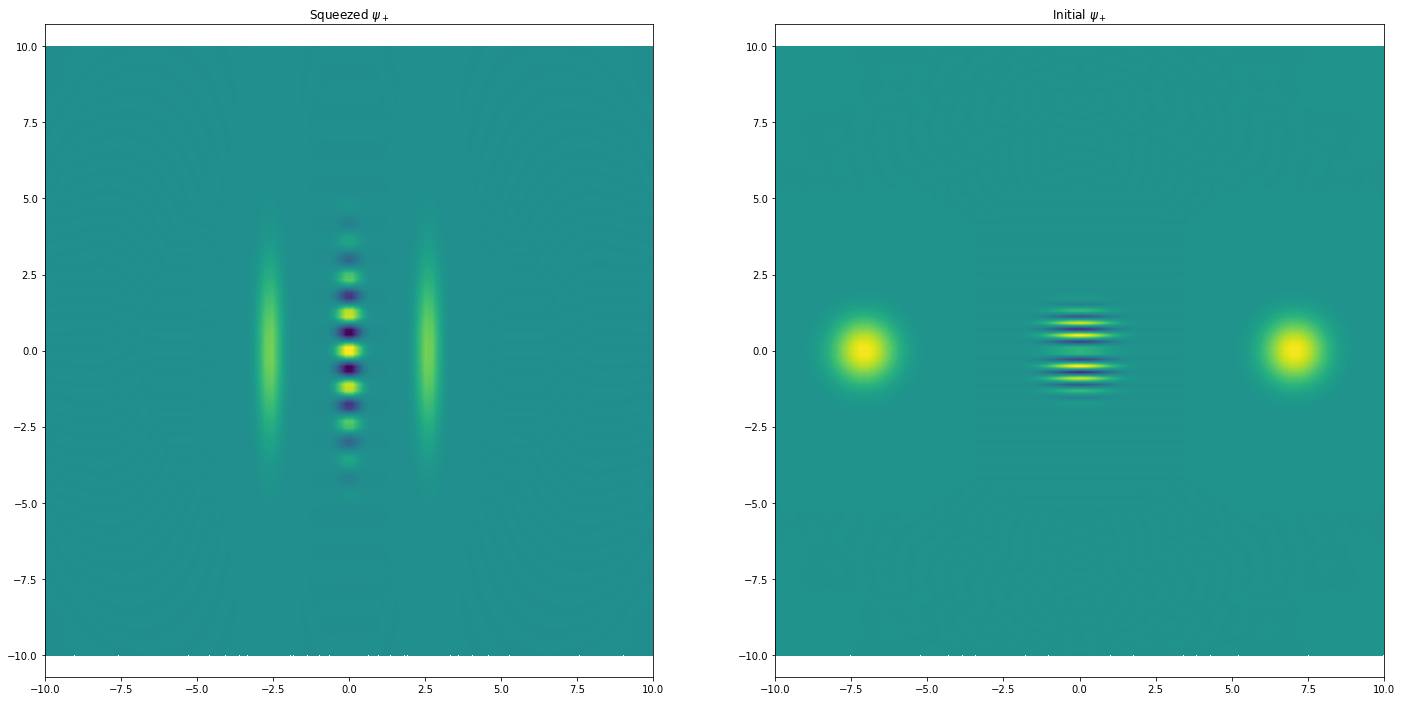

In [170]:
xvec = np.linspace(-10, 10, 100)
yvec = np.linspace(-10, 10, 100)

W_psi_sq = qt.wigner(psi_p_sq, xvec, yvec)
W_psi = qt.wigner(psi_p, xvec, yvec)

fig, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].contourf(xvec, yvec, W_psi_sq, 100)
axes[0].axis('equal')
axes[0].set(xlim=(-10, 10), ylim=(-5, 5))
axes[0].set_title("Squeezed $\psi_+$")

axes[1].contourf(xvec, yvec, W_psi, 100)
axes[1].axis('equal')
axes[1].set(xlim=(-10, 10), ylim=(-2, 2))
axes[1].set_title("Initial $\psi_+$")

plt.show()

In [171]:
def H_s(Omega, times, psi, r_s, phi_s):
    H = Omega/2*(qt.tensor(qt.sigmam(), (qt.destroy(nMax)+np.tanh(r_s)*np.exp(1j*phi_s)*qt.create(nMax)))\
                           +qt.tensor(qt.sigmap(), (qt.create(nMax)+np.tanh(r_s)*np.exp(-1j*phi_s)*qt.destroy(nMax))))
    result = qt.mesolve(H, psi, times, [], qt.tensor((qt.qeye(2)-qt.sigmaz())/2, qt.qeye(nMax)))
    return result.expect[0]

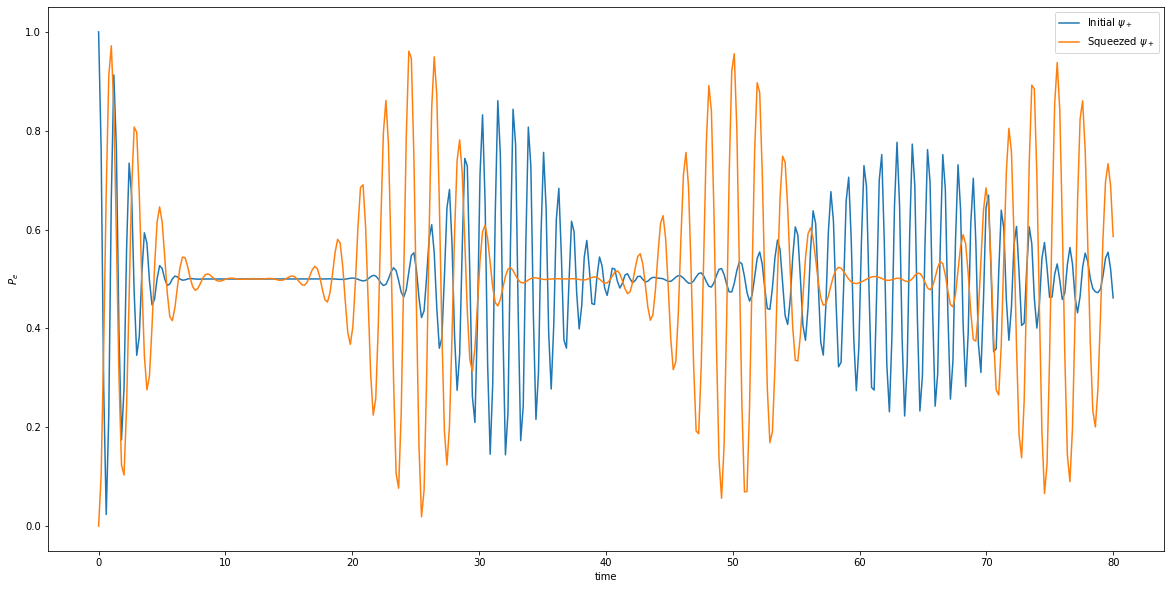

In [172]:
timeList = np.linspace(0, 80, 400)

plt.figure(figsize=(20,10))
plt.plot(timeList, H(1, timeList, psi_p), label = "Initial $\psi_+$")
plt.plot(timeList, H_s(1, timeList, psi_p_sq, r, phi), label = "Squeezed $\psi_+$")
# plt.plot(timeList, H(1, timeList, psi_sq), label = "$test$")
# plt.plot(timeList, H(1, timeList, psi_m), label = "$\psi_-$")
plt.legend(loc = "upper right")
plt.xlabel("time")
plt.ylabel("$P_e$")
plt.show()

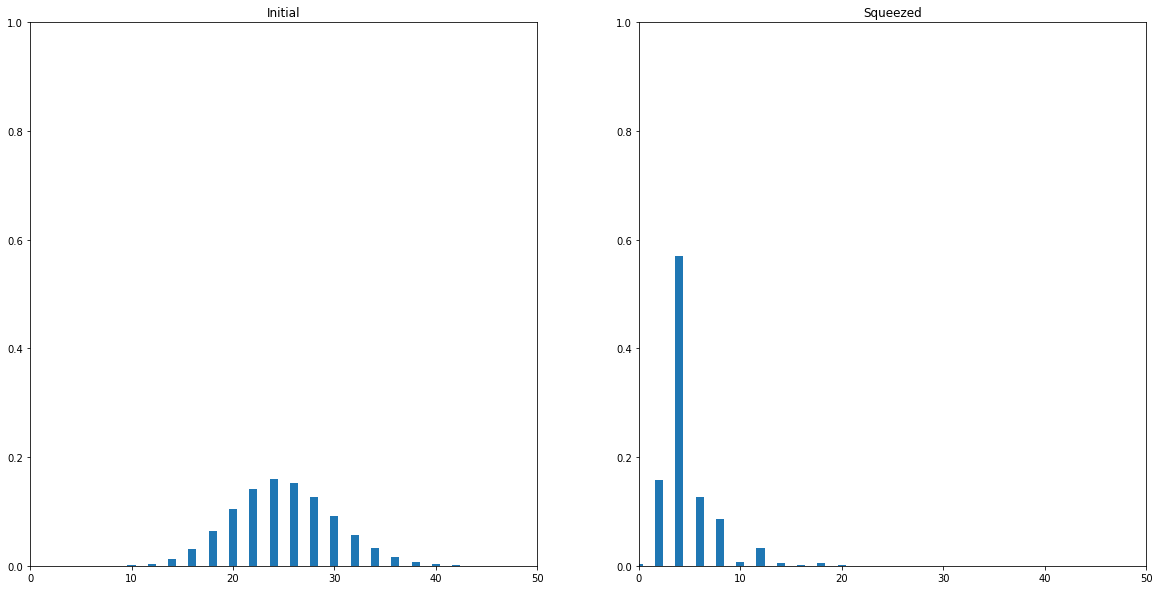

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].bar(np.arange(0, 2*navg**2), qt.ket2dm(psi_p).diag()[:2*navg**2])
axes[0].set_title("Initial")
axes[0].set(xlim=(0, 2*navg**2), ylim=(0, 1))

axes[1].bar(np.arange(0, 2*navg**2), qt.ket2dm(psi_p_sq).diag()[:2*navg**2])
axes[1].set_title("Squeezed")
axes[1].set(xlim=(0, 2*navg**2), ylim=(0, 1))

plt.show()

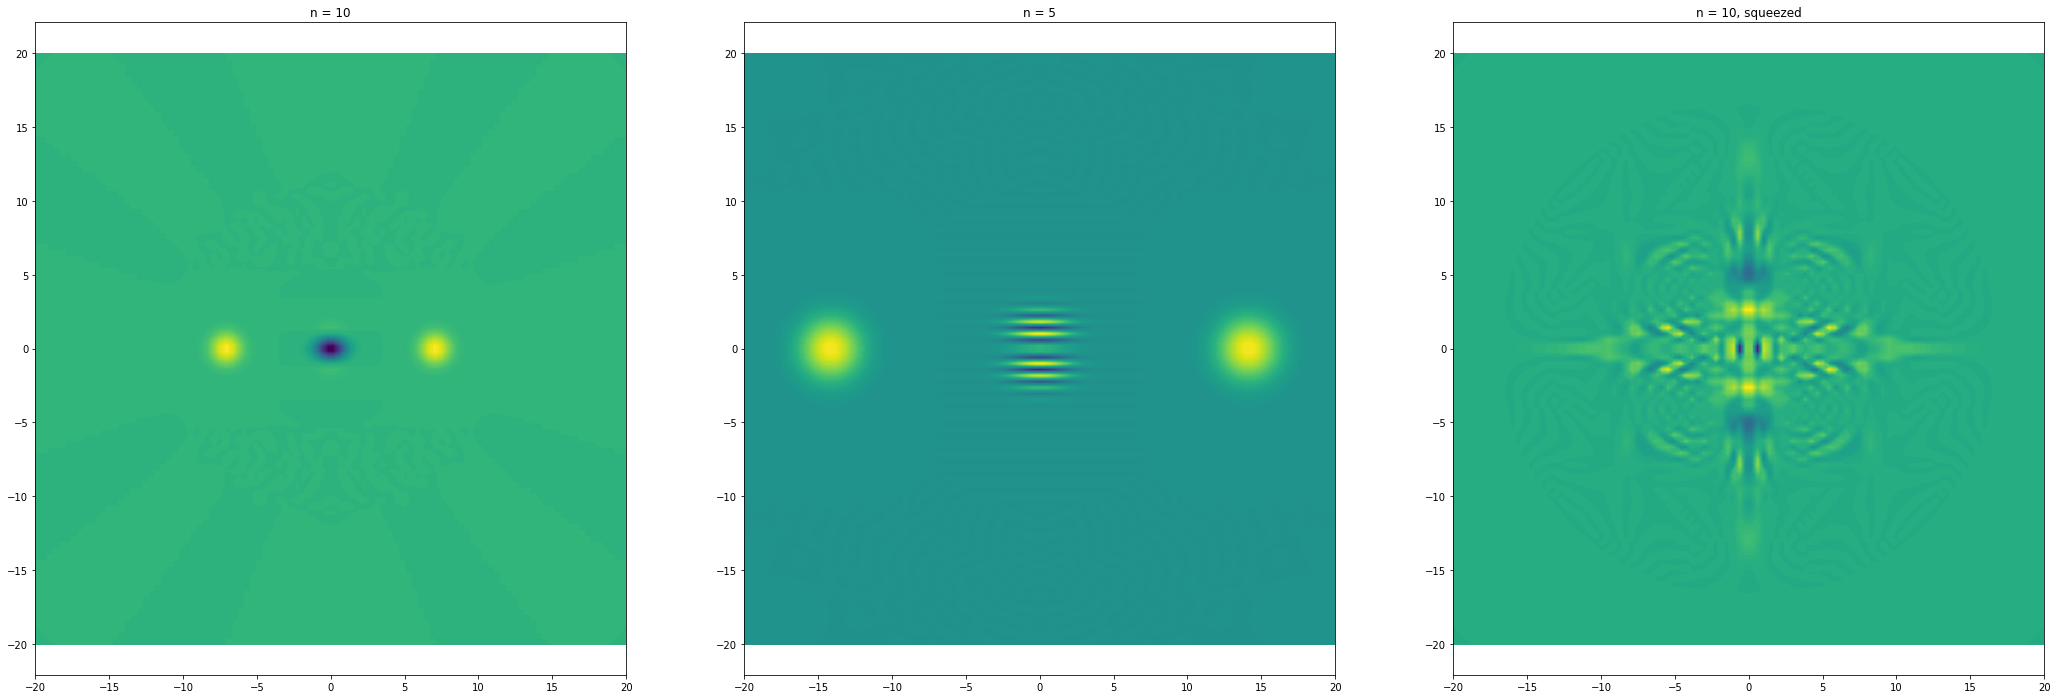

In [182]:
_navg = 10
_nMax = 150

_s = qt.tensor(qt.qeye(2), qt.squeeze(_nMax, r*np.exp(1j*phi)))
_psi_p = qt.tensor(qt.basis(2, 0), (qt.coherent(_nMax, _navg)+qt.coherent(_nMax, -_navg)).unit())
_psi_p_sq = _s*_psi_p

r = 20

xvec = np.linspace(-r, r, 100)
yvec = np.linspace(-r, r, 100)

_W_psi = qt.wigner(_psi_p, xvec, yvec)
_W_psi_sq = qt.wigner(_psi_p_sq, xvec, yvec)

fig, axes = plt.subplots(1, 3, figsize=(36, 12))

axes[0].contourf(xvec, yvec, _W_psi, 100)
axes[0].axis('equal')
axes[0].set(xlim=(-r, r), ylim=(-r, r))
axes[0].set_title("n = 10")

axes[1].contourf(xvec, yvec, W_psi, 100)
axes[1].axis('equal')
axes[1].set(xlim=(-r, r), ylim=(-r, r))
axes[1].set_title("n = 5")

axes[2].contourf(xvec, yvec, _W_psi_sq, 100)
axes[2].axis('equal')
axes[2].set(xlim=(-r, r), ylim=(-r, r))
axes[2].set_title("n = 10, squeezed")

plt.show()